In [87]:
import pandas as pd


In [107]:
df = pd.read_csv('data/final_data.csv')
df_full = df

df = df[df['Location'] != 'BR']

# One-hot encode the 'Location' column
df_encoded = pd.get_dummies(df, columns=['Location'])

df_encoded.set_index('Date', inplace=True)

df_encoded

,Precip Mean (in),Precip Std (in),UV Index Mean,UV Index Std,Sea Level Pressure Mean,Sea Level Pressure Std,Max Air Temp Mean (F),Max Air Temp Std (F),Min Air Temp Mean (F),Min Air Temp Std (F),Avg Air Temp Mean (F),Avg Air Temp Std (F),Avg Humidity Mean (%),Avg Humidity Std (%),Wind Speed Mean (mph),Wind Speed Std (mph),Production,Previous Month,Location_CA,Location_FL
Date,,,,,,,,,,,,,,,,,,,,
2010-01-31,0.084113,0.150124,0.151025,0.092443,0.315062,0.052643,54.779724,5.714668,39.490092,3.269914,45.937615,4.423281,88.161866,4.629392,4.263306,1.979104,55000.0,55000.0,True,False
2010-02-28,0.077500,0.122593,0.266584,0.101418,0.399829,0.051508,60.862946,4.334016,42.625893,3.115623,51.224554,2.352450,85.723214,3.120897,3.875000,1.395338,55000.0,55000.0,True,False
2010-03-31,0.023162,0.058168,0.499310,0.123196,0.321871,0.071581,66.651152,7.516172,39.754666,3.709048,53.088767,4.489845,69.672811,9.265417,4.770449,1.449245,55000.0,55000.0,True,False
2010-04-30,0.063458,0.140083,0.590567,0.181362,0.351417,0.081193,68.337083,7.577927,42.756667,4.113720,55.486250,5.266357,67.433333,8.244299,5.058750,1.436175,59000.0,55000.0,True,False
2010-05-31,0.008105,0.017601,0.761757,0.124038,0.336467,0.095164,76.387500,6.710604,47.235138,4.148557,62.450230,4.967507,51.389401,9.074577,5.438825,1.500282,59000.0,59000.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,0.053000,0.116617,0.868817,0.140880,0.527895,0.098300,81.674194,3.675723,62.513978,5.146396,71.568817,3.516289,74.283871,8.587268,12.670968,3.931579,19800.0,19800.0,False,True
2024-04-30,0.025311,0.092163,0.922222,0.116242,0.575342,0.092921,84.264444,3.314671,61.523333,4.409656,72.793333,3.216342,65.363333,7.229184,13.816667,3.947246,18800.0,19800.0,False,True
2024-05-31,0.053828,0.156892,0.933333,0.064979,0.470029,0.051362,92.912903,2.462920,71.753763,3.460846,81.884946,2.383894,68.710753,4.678654,13.373118,1.960091,17800.0,18800.0,False,True


In [108]:
X = df_encoded.drop(columns=['Production'])  # All columns except 'Production'
y = df_encoded['Production']

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [111]:
y_pred = model.predict(X_test)
y_pred

array([ 49958.23074719, 141949.18798917,  51104.99386621,  54653.59304319,
       118125.38472897,  59309.83908885,  50029.82993559, 143715.09451218,
        45762.02368001, 100932.38958212,  45059.82699117,  57673.94626509,
        41419.44315067,  19728.4419785 ,  52036.62039195,  67012.16065816,
        59254.70922128,  45403.08940971,  71023.82071915,  45933.02256792,
        40206.31668164,  44491.29812591,  53349.11397415,  18444.00381538,
        51681.39844091,  54902.1995818 ,  46042.56019777, 132328.22210288,
        52199.75751086,  52555.14700646,  48241.89088293, 111131.43182278,
       137878.3258942 ,  72009.51048576, 115185.47548366, 138880.27952965,
        75365.69733284,  46120.0981471 ,  68209.41830512,  43052.39466062,
       142067.61198859,  57318.38874559, 141417.2482389 ,  45738.30799051,
        59525.03585246,  61881.81354673,  61397.00508002, 139817.53099382,
       133217.31599968, 140168.48956061,  74291.27412353,  54698.32807697,
        45634.44709874,  

In [112]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3860966.3521459294


In [113]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.9972447400974406


In [114]:
# Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-7.51797229e+03  9.64660793e+03  5.50961455e+03  8.28689037e+03
 -2.44957079e+03 -4.76432282e+03  3.86147316e+02 -4.70393756e+02
  4.56914803e+02  4.08539006e+02 -8.76129793e+02  6.32599344e+01
 -3.63622848e+01 -1.93594127e+02  1.79560710e+02  2.37791793e+01
  9.96812048e-01  2.19908414e+03 -2.19908414e+03]
Intercept: 1465.6415649713235


In [115]:
from sklearn.linear_model import LassoCV


lasso = LassoCV(cv=5, random_state=42)  # 5-fold cross-validation
lasso.fit(X_train, y_train)

# Predict on test set
y_pred = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print (f"R2 Score: {r2}")
print(f"Best Alpha (Regularization Strength): {lasso.alpha_}")

# Print model coefficients
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)

Mean Squared Error: 4163516.772907392
R2 Score: 0.997028834293868
Best Alpha (Regularization Strength): 988230.3911795843
Coefficients: [ 0.          0.          0.          0.         -0.         -0.
  0.         -0.         -0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.          0.99331462  0.
 -0.        ]
Intercept: -18.66516276209586


In [116]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

# Train Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape}")


# Perform K-Fold Cross Validation (e.g., 5-fold)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive for better readability
cv_scores = -cv_scores

# Print the cross-validation scores and the average score
print(f"Cross-validation MSE scores: {cv_scores}")
print(f"Average Cross-validation MSE: {np.mean(cv_scores)}")

# Print feature importances
importances = rf_model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

Mean Squared Error: 8490051.414310345
R2 Score: 0.993941335899103
MAPE: 0.02975231696779821
Cross-validation MSE scores: [3.63907063e+07 4.30317832e+06 6.51533246e+07 2.22515539e+08
 3.06540182e+08]
Average Cross-validation MSE: 126980585.96769509
Feature Importances:
Precip Mean (in): 0.0008
Precip Std (in): 0.0007
UV Index Mean: 0.0008
UV Index Std: 0.0012
Sea Level Pressure Mean: 0.0009
Sea Level Pressure Std: 0.0007
Max Air Temp Mean (F): 0.0005
Max Air Temp Std (F): 0.0004
Min Air Temp Mean (F): 0.0019
Min Air Temp Std (F): 0.0008
Avg Air Temp Mean (F): 0.0005
Avg Air Temp Std (F): 0.0004
Avg Humidity Mean (%): 0.0006
Avg Humidity Std (%): 0.0011
Wind Speed Mean (mph): 0.0010
Wind Speed Std (mph): 0.0012
Previous Month: 0.9861
Location_CA: 0.0001
Location_FL: 0.0004


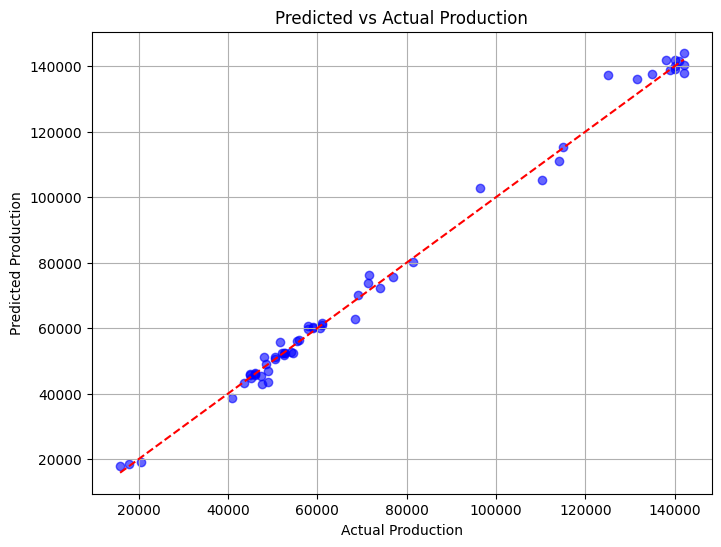

In [117]:
import matplotlib.pyplot as plt

# Scatter plot of Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Predicted vs Actual Production')
plt.grid(True)
plt.show()

In [118]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Train Random Forest Regressor model on the entire dataset
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)  # Train on entire dataset

# Predict on the entire dataset
y_full_pred = rf_model.predict(X)

# Evaluate the model (using the entire dataset predictions)
mse_full = mean_squared_error(y, y_full_pred)
print(f"Mean Squared Error (on full dataset): {mse_full}")

r2_full = r2_score(y, y_full_pred)
print(f"R2 Score (on full dataset): {r2_full}")

mape_full = mean_absolute_percentage_error(y, y_full_pred)
print(f"MAPE (on full dataset): {mape_full}")

# Store predictions in a DataFrame
predictions_df = pd.DataFrame({'True Values': y, 'Predicted Values': y_full_pred})

# Display the DataFrame with true values and predicted values
print(predictions_df.head())  # Display the first few rows of the DataFrame


Mean Squared Error (on full dataset): 2396711.254027778
R2 Score (on full dataset): 0.9978097431519192
MAPE (on full dataset): 0.013746362438778218
            True Values  Predicted Values
Date                                     
2010-01-31      55000.0           55110.0
2010-02-28      55000.0           54942.0
2010-03-31      55000.0           55212.0
2010-04-30      59000.0           57392.0
2010-05-31      59000.0           58930.0


In [ ]:
df_br = df_full[df_full['Location'] == 'BR']